In [ ]:
# Step 1: Upload your kaggle.json file (API token)
from google.colab import files
files.upload()

# Step 2: Create a Kaggle directory and move the kaggle.json file to it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Step 3: Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the retinal disease classification dataset using the Kaggle API
!kaggle datasets download -d kmader/parkinsons-drawings

# Step 5: Unzip the downloaded dataset
!unzip parkinsons-drawings.zip -d ./parkinsons-drawings/


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kmader/parkinsons-drawings
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 80% 33.0M/41.4M [00:00<00:00, 85.8MB/s]
100% 41.4M/41.4M [00:00<00:00, 90.3MB/s]
Archive:  parkinsons-drawings.zip
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V01HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V02HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V03HE1.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V04HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V05HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V06HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V07HE01.png  
  inflating: ./parkinsons-drawings/drawings/spiral/testing/healthy/V08HE01.png  
  inflating: ./parkinsons-drawings/drawings

In [ ]:
# Step 6: Display the path of the dataset
import os
dataset_path = os.path.abspath("./parkinsons-drawings/")
print(f"Dataset extracted to: {dataset_path}")


Dataset extracted to: /content/parkinsons-drawings


Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5219 - loss: 1.8348 - val_accuracy: 0.5000 - val_loss: 2.5212
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.5141 - loss: 2.3564 - val_accuracy: 0.5000 - val_loss: 1.3065
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - accuracy: 0.5688 - loss: 0.9155 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 841ms/step - accuracy: 0.5063 - loss: 0.7085 - val_accuracy: 0.5000 - val_loss: 0.7371
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.4516 - loss: 0.7631 - val_accuracy: 0.5000 - val_loss: 0.7119
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5375 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step - accuracy: 0.5234 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 849ms/step - accuracy: 0.4938 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.6928
Ep

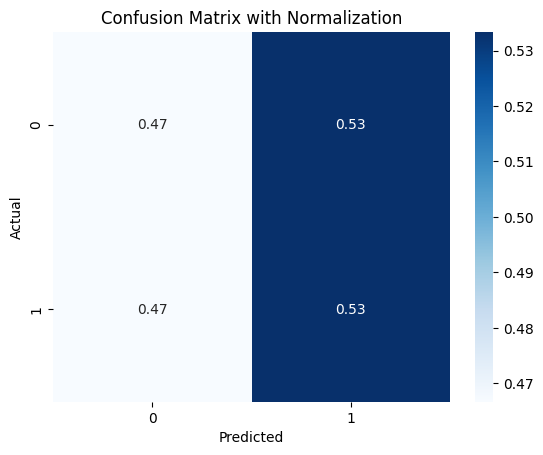

Confusion Matrix (RMSprop):


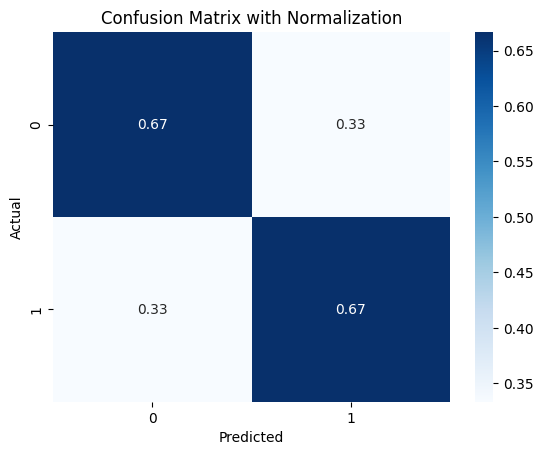

ROC Curve (Adam):


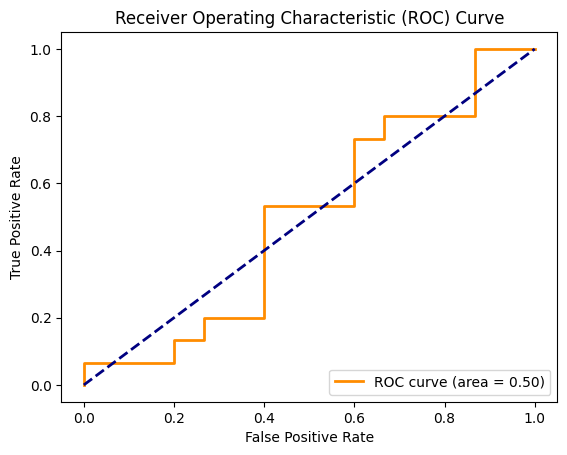

ROC Curve (RMSprop):


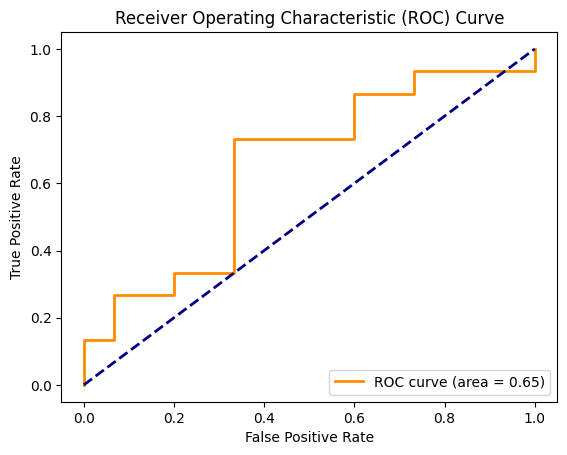

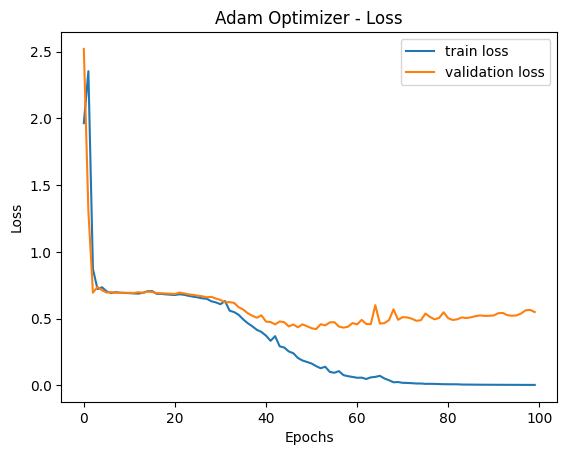

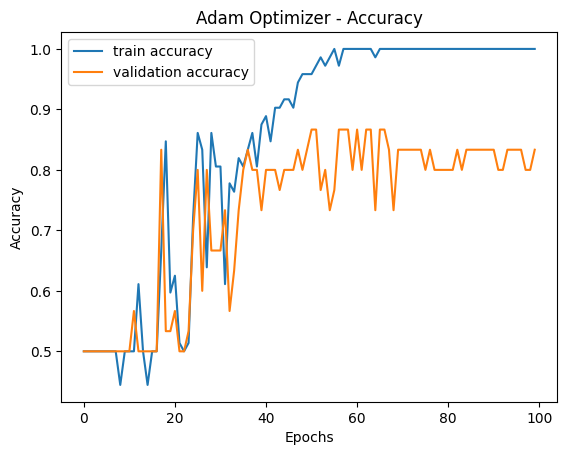

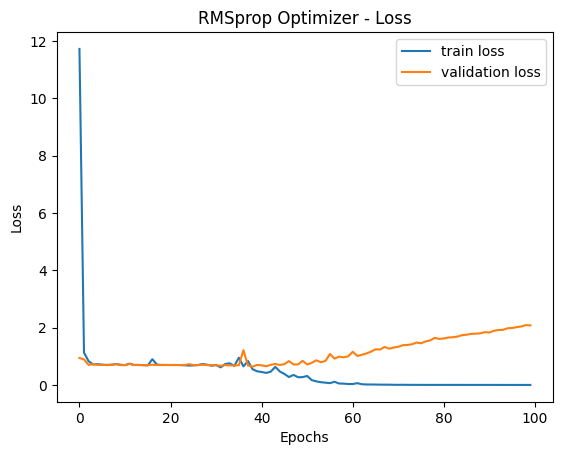

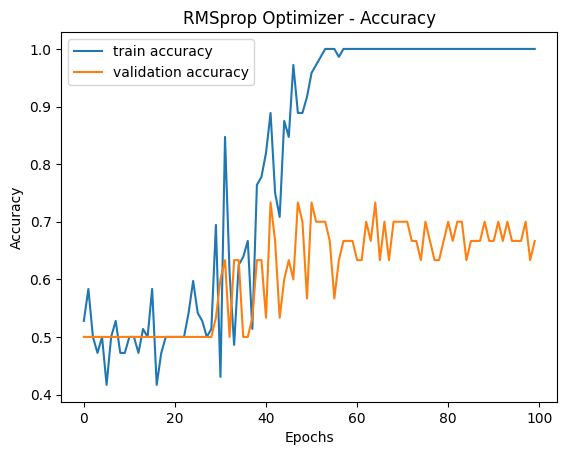

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, log_loss
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paths to spiral and wave datasets
data_dir = 'parkinsons-drawings/drawings'
spiral_train_dir = os.path.join(data_dir, 'spiral/training')
spiral_test_dir = os.path.join(data_dir, 'spiral/testing')
wave_train_dir = os.path.join(data_dir, 'wave/training')
wave_test_dir = os.path.join(data_dir, 'wave/testing')

# Data preparation using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

spiral_train_gen = datagen.flow_from_directory(spiral_train_dir, target_size=(128, 128), class_mode='binary', batch_size=32)
spiral_test_gen = datagen.flow_from_directory(spiral_test_dir, target_size=(128, 128), class_mode='binary', batch_size=32)
wave_train_gen = datagen.flow_from_directory(wave_train_dir, target_size=(128, 128), class_mode='binary', batch_size=32)
wave_test_gen = datagen.flow_from_directory(wave_test_dir, target_size=(128, 128), class_mode='binary', batch_size=32)

# Model 1 (Adam optimizer)
model_adam = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model 2 (RMSprop optimizer)
model_rmsprop = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model 1 (Adam optimizer)
history_adam = model_adam.fit(spiral_train_gen, epochs=100, validation_data=spiral_test_gen)

# Train Model 2 (RMSprop optimizer)
history_rmsprop = model_rmsprop.fit(wave_train_gen, epochs=100, validation_data=wave_test_gen)

# Evaluate the models
spiral_test_gen.reset()
wave_test_gen.reset()
adam_predictions = model_adam.predict(spiral_test_gen)
rmsprop_predictions = model_rmsprop.predict(wave_test_gen)

# Binarize the predictions
adam_preds = (adam_predictions > 0.5).astype(int)
rmsprop_preds = (rmsprop_predictions > 0.5).astype(int)

# Actual test labels
y_true_spiral = spiral_test_gen.classes
y_true_wave = wave_test_gen.classes

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    logloss = log_loss(y_true, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"Log Loss: {logloss}")

# Evaluation for both models
print("Model 1 (Adam) Evaluation:")
evaluate_model(y_true_spiral, adam_preds)

print("\nModel 2 (RMSprop) Evaluation:")
evaluate_model(y_true_wave, rmsprop_preds)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix with Normalization')
    plt.show()

# Plot confusion matrix
print("Confusion Matrix (Adam):")
plot_confusion_matrix(y_true_spiral, adam_preds)

print("Confusion Matrix (RMSprop):")
plot_confusion_matrix(y_true_wave, rmsprop_preds)

# ROC Curve and AUC
def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# ROC curve for both models
print("ROC Curve (Adam):")
plot_roc_curve(y_true_spiral, adam_predictions)

print("ROC Curve (RMSprop):")
plot_roc_curve(y_true_wave, rmsprop_predictions)

# Plot learning curves
def plot_learning_curve(history, title):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Learning curves for both models
plot_learning_curve(history_adam, 'Adam Optimizer')
plot_learning_curve(history_rmsprop, 'RMSprop Optimizer')


In [ ]:
import os
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, log_loss

# Function to evaluate the model and return key metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    logloss = log_loss(y_true, y_pred)

    metrics = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'mse': mse,
        'mae': mae,
        'log_loss': logloss
    }
    return metrics

# After training both models (Adam and RMSprop)
adam_metrics = evaluate_model(y_true_spiral, adam_preds, 'Adam')
rmsprop_metrics = evaluate_model(y_true_wave, rmsprop_preds, 'RMSprop')

# Compare and save the best model based on accuracy
if adam_metrics['accuracy'] > rmsprop_metrics['accuracy']:
    best_model = model_adam
    best_metrics = adam_metrics
else:
    best_model = model_rmsprop
    best_metrics = rmsprop_metrics

# Save the best model to a .h5 file
best_model.save('best_parkinsons_model.h5')

# Save the evaluated metrics in a JSON file for easy access in Django
with open('model_metrics.json', 'w') as json_file:
    json.dump(best_metrics, json_file)


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = 'parkinsons-drawings/drawings'

# Directory paths for spiral and wave drawings
spiral_train_dir = os.path.join(data_dir, 'spiral/training')
spiral_test_dir = os.path.join(data_dir, 'spiral/testing')

wave_train_dir = os.path.join(data_dir, 'wave/training')
wave_test_dir = os.path.join(data_dir, 'wave/testing')

Data Augmentation and Generators


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

# Spiral training and testing datasets
spiral_train_gen = datagen.flow_from_directory(spiral_train_dir, target_size=(128, 128),
                                               class_mode='binary', batch_size=32)
spiral_test_gen = datagen.flow_from_directory(spiral_test_dir, target_size=(128, 128),
                                              class_mode='binary', batch_size=32)

# Wave training and testing datasets
wave_train_gen = datagen.flow_from_directory(wave_train_dir, target_size=(128, 128),
                                             class_mode='binary', batch_size=32)
wave_test_gen = datagen.flow_from_directory(wave_test_dir, target_size=(128, 128),
                                            class_mode='binary', batch_size=32)


Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Model Creation (for Spiral)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on spiral data
history = model.fit(spiral_train_gen, epochs=100, validation_data=spiral_test_gen)

# Save the model for future use (e.g., connecting with Django)
model.save('parkinsons_spiral_model.h5')


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 754ms/step - accuracy: 0.5000 - loss: 1.1093 - val_accuracy: 0.5000 - val_loss: 0.7095
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 594ms/step - accuracy: 0.5359 - loss: 0.7015 - val_accuracy: 0.5000 - val_loss: 0.7142
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 835ms/step - accuracy: 0.5625 - loss: 0.7276 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 858ms/step - accuracy: 0.5104 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5000 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.5295 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 595ms/step - accuracy: 0.5000 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6851
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 0.4036 - loss: 0.6866 - val_accuracy: 0.5000 - val_

In [ ]:
# Train the model on spiral data
history = model.fit(spiral_train_gen, epochs=100, validation_data=spiral_test_gen)

# Save the model for future use (e.g., connecting with Django)
model.save('parkinsons_spiral_model.h5')


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 1.0000 - loss: 1.5030e-04 - val_accuracy: 0.7667 - val_loss: 1.0685
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 602ms/step - accuracy: 1.0000 - loss: 1.8313e-04 - val_accuracy: 0.7667 - val_loss: 1.0646
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.1709e-04 - val_accuracy: 0.7667 - val_loss: 1.0582
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step - accuracy: 1.0000 - loss: 1.3810e-04 - val_accuracy: 0.7667 - val_loss: 1.0584
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 590ms/step - accuracy: 1.0000 - loss: 1.2461e-04 - val_accuracy: 0.7667 - val_loss: 1.0622
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 854ms/step - accuracy: 1.0000 - loss: 9.8297e-05 - val_accuracy: 0.7667 - val_loss: 1.0712
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 591ms/step - accuracy: 1.0000 - loss: 1.2030e-04 - val_accuracy: 0.7667 - val_loss: 1.0787
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 1.2092e-04 

In [ ]:
# Train the model on wave data
history_wave = model.fit(wave_train_gen, epochs=100, validation_data=wave_test_gen)

# Save the model
model.save('parkinsons_wave_model.h5')


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 977ms/step - accuracy: 0.4549 - loss: 3.0328 - val_accuracy: 0.5333 - val_loss: 0.7422
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 601ms/step - accuracy: 0.5413 - loss: 0.6854 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 879ms/step - accuracy: 0.3323 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 873ms/step - accuracy: 0.4938 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 862ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5076 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.4983 - loss: 0.6928 - val_accuracy: 0.5333 - val_